In [1]:
#Importing all the libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output
import numpy as np # mathematical essentials
import statsmodels.formula.api as smf # regression modeling

#Setting the pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


#Specify the file name
file = "./__datasets/birthweight_low.xlsx"


#Run the file into Python
wgt = pd.read_excel(io    = file,
                       header = 0,
                       sheet_name = 0)
wgt.head(n=10)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956
5,67,11.0,4,8.0,40,8.0,4,9,16,14,0,1,0,0,1,0,0,1984
6,54,12.0,2,12.0,46,12.0,9,9,17,12,1,0,1,0,0,1,0,2050
7,71,14.0,4,7.0,51,11.0,9,8,15,13,0,1,0,0,1,0,0,2068
8,56,12.0,1,9.0,53,14.0,8,9,14,9,1,1,0,0,1,0,0,2148
9,58,12.0,2,12.0,61,16.0,9,9,13,6,0,0,1,0,0,1,0,2180


In [2]:
for column in wgt:
    print(column)

mage
meduc
monpre
npvis
fage
feduc
omaps
fmaps
cigs
drink
male
mwhte
mblck
moth
fwhte
fblck
foth
bwght


In [3]:
wgt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1   meduc   193 non-null    float64
 2   monpre  196 non-null    int64  
 3   npvis   193 non-null    float64
 4   fage    196 non-null    int64  
 5   feduc   189 non-null    float64
 6   omaps   196 non-null    int64  
 7   fmaps   196 non-null    int64  
 8   cigs    196 non-null    int64  
 9   drink   196 non-null    int64  
 10  male    196 non-null    int64  
 11  mwhte   196 non-null    int64  
 12  mblck   196 non-null    int64  
 13  moth    196 non-null    int64  
 14  fwhte   196 non-null    int64  
 15  fblck   196 non-null    int64  
 16  foth    196 non-null    int64  
 17  bwght   196 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 27.7 KB


In [4]:
wgt.isnull().sum()

mage      0
meduc     3
monpre    0
npvis     3
fage      0
feduc     7
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

In [5]:
meduc_median = wgt['meduc'].median()
wgt['meduc'].fillna(value = meduc_median, inplace = True)

npvis_median = wgt['npvis'].median()
wgt['npvis'].fillna(value = npvis_median, inplace = True)

feduc_median = wgt['feduc'].median()
wgt['feduc'].fillna(value = feduc_median, inplace = True)


In [6]:
wgt.isnull().sum()

mage      0
meduc     0
monpre    0
npvis     0
fage      0
feduc     0
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

In [7]:
wgt.describe()

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,40.153061,13.913265,2.341837,11.607143,39.290816,13.852041,8.193878,8.964286,10.928571,5.397959,0.551020,0.270408,0.382653,0.346939,0.346939,0.341837,0.311224,3334.086735
std,10.250055,2.040017,1.355136,4.234625,8.982725,2.586661,1.576482,0.651428,6.101282,3.001674,0.498664,0.445308,0.487279,0.477215,0.477215,0.475540,0.464180,646.700904
min,23.000000,8.000000,1.000000,2.000000,23.000000,1.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,697.000000
25%,33.000000,12.000000,2.000000,10.000000,34.750000,12.000000,8.000000,9.000000,6.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2916.250000
50%,39.000000,14.000000,2.000000,12.000000,38.000000,14.000000,9.000000,9.000000,11.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3452.000000
75%,46.000000,16.000000,3.000000,12.000000,43.000000,16.000000,9.000000,9.000000,15.250000,7.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3759.500000
max,71.000000,17.000000,8.000000,35.000000,73.000000,17.000000,10.000000,10.000000,25.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4933.000000


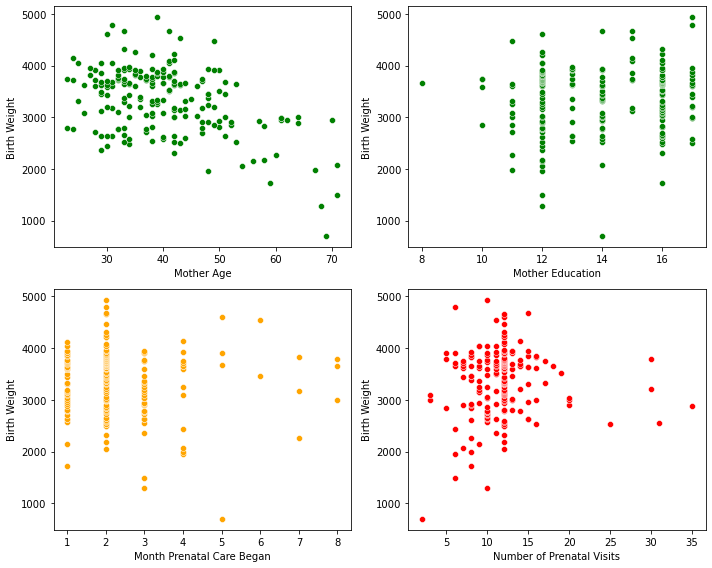

In [8]:
#Creting Scatter Plots to see distribution

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = wgt['mage'],
                y = wgt['bwght'],
                color = 'g')


# adding labels
plt.xlabel(xlabel = 'Mother Age')
plt.ylabel(ylabel = 'Birth Weight')


########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = wgt['meduc'],
                y = wgt['bwght'],
                color = 'g')


# adding labels 
plt.xlabel(xlabel = 'Mother Education')
plt.ylabel(ylabel = 'Birth Weight')


########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = wgt['monpre'],
                y = wgt['bwght'],
                color = 'orange')


# adding labels 
plt.xlabel(xlabel = 'Month Prenatal Care Began')
plt.ylabel(ylabel = 'Birth Weight')


########################


# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = wgt['npvis'],
                y = wgt['bwght'],
                color = 'r')


# adding labels 
plt.xlabel(xlabel = 'Number of Prenatal Visits')
plt.ylabel(ylabel = 'Birth Weight')

###############################


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()



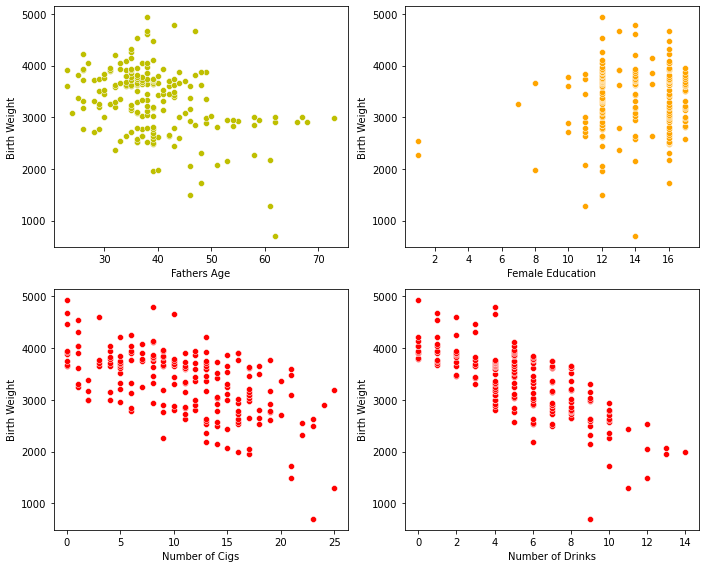

In [9]:
#Setting Figure Size 
fig, ax = plt.subplots(figsize = (10, 8))

########################

# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = wgt['fage'],
                y = wgt['bwght'],
                color = 'y')


# adding labels 
plt.xlabel(xlabel = 'Fathers Age')
plt.ylabel(ylabel = 'Birth Weight')


########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = wgt['feduc'],
                y = wgt['bwght'],
                color = 'orange')


# adding labels 
plt.xlabel(xlabel = 'Female Education')
plt.ylabel(ylabel = 'Birth Weight')

########################

# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = wgt['cigs'],
                y = wgt['bwght'],
                color = 'r')


# adding labels 
plt.xlabel(xlabel = 'Number of Cigs')
plt.ylabel(ylabel = 'Birth Weight')

########################

# developing a scatterplot

plt.subplot(2, 2, 4)
sns.scatterplot(x = wgt['drink'],
                y = wgt['bwght'],
                color = 'r')


# adding labels 
plt.xlabel(xlabel = 'Number of Drinks')
plt.ylabel(ylabel = 'Birth Weight')


########################
# Making a better layout and displaying the results
plt.tight_layout()
plt.show()

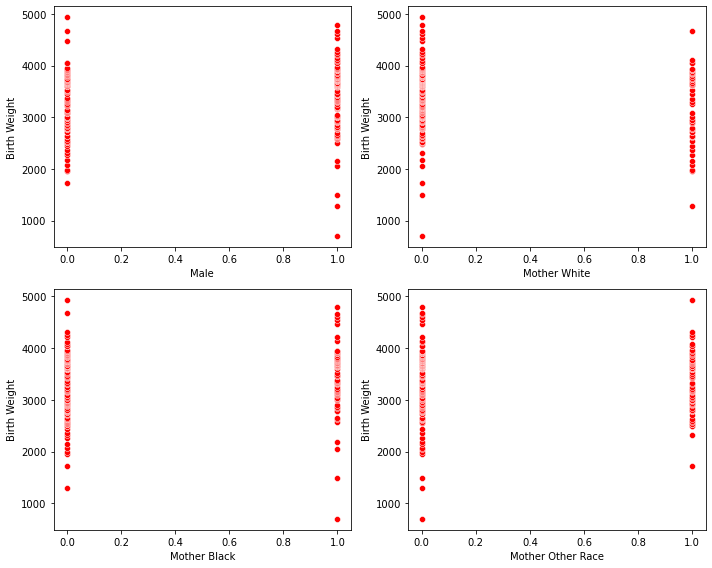

In [10]:
#Setting Figure Size 
fig, ax = plt.subplots(figsize = (10, 8))

#################################

# developing a scatterplot

plt.subplot(2, 2, 1)
sns.scatterplot(x = wgt['male'],
                y = wgt['bwght'],
                color = 'r')


# adding labels 
plt.xlabel(xlabel = 'Male')
plt.ylabel(ylabel = 'Birth Weight')


########################

# developing a scatterplot

plt.subplot(2, 2, 2)
sns.scatterplot(x = wgt['mwhte'],
                y = wgt['bwght'],
                color = 'r')


# adding labels 
plt.xlabel(xlabel = 'Mother White')
plt.ylabel(ylabel = 'Birth Weight')

########################

# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = wgt['mblck'],
                y = wgt['bwght'],
                color = 'r')


# adding labels 
plt.xlabel(xlabel = 'Mother Black')
plt.ylabel(ylabel = 'Birth Weight')

########################

# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = wgt['moth'],
                y = wgt['bwght'],
                color = 'r')


# adding labels 
plt.xlabel(xlabel = 'Mother Other Race')
plt.ylabel(ylabel = 'Birth Weight')



#######################

# Making a better layout and displaying the results
plt.tight_layout()
plt.show()

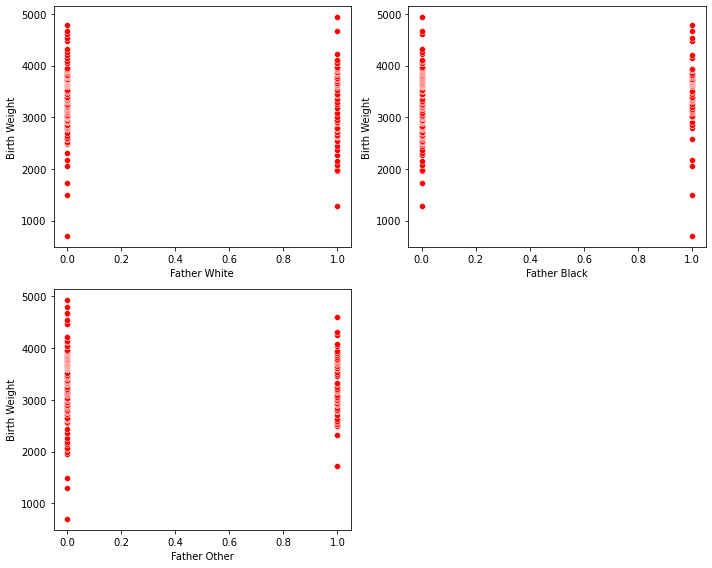

In [11]:
#creating figure size
fig, ax = plt.subplots(figsize = (10, 8))

########################

# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = wgt['fwhte'],
                y = wgt['bwght'],
                color = 'r')


# adding labels 
plt.xlabel(xlabel = 'Father White')
plt.ylabel(ylabel = 'Birth Weight')




########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = wgt['fblck'],
                y = wgt['bwght'],
                color = 'r')


# adding labels 
plt.xlabel(xlabel = 'Father Black')
plt.ylabel(ylabel = 'Birth Weight')


#######################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = wgt['foth'],
                y = wgt['bwght'],
                color = 'r')


# adding labels 
plt.xlabel(xlabel = 'Father Other')
plt.ylabel(ylabel = 'Birth Weight')

#############################

# Making a better layout and displaying the results
plt.tight_layout()
plt.show()

In [12]:
wgt['cigdrink'] = wgt['cigs'] * wgt['drink']

In [13]:
#convertion of separated values in logs

wgt['log_meduc']  =  np.log(wgt['meduc'])
wgt['log_monpre']  =  np.log(wgt['monpre'])
wgt['log_fage']  =  np.log(wgt['fage'])
wgt['log_feduc']  =  np.log(wgt['feduc'])
wgt['log_npvis']  =  np.log(wgt['npvis'])
wgt['log_bwght']  =  np.log(wgt['bwght'])

#0/-inf need to add a value 

wgt['log_cigs']  =  np.log(wgt['cigs'] + 0.00001)
wgt['log_drink']  =  np.log(wgt['drink'] + 0.00001)
wgt['log_cigdrink']  =  np.log(wgt['cigdrink'] + 0.00001)

wgt.describe()

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,cigdrink,log_meduc,log_monpre,log_fage,log_feduc,log_npvis,log_bwght,log_cigs,log_drink,log_cigdrink
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,40.153061,13.913265,2.341837,11.607143,39.290816,13.852041,8.193878,8.964286,10.928571,5.397959,0.551020,0.270408,0.382653,0.346939,0.346939,0.341837,0.311224,3334.086735,65.474490,2.621830,0.718551,3.647016,2.597524,2.392537,8.088802,1.615902,0.857949,2.463006
std,10.250055,2.040017,1.355136,4.234625,8.982725,2.586661,1.576482,0.651428,6.101282,3.001674,0.498664,0.445308,0.487279,0.477215,0.477215,0.475540,0.464180,646.700904,58.627677,0.150067,0.503378,0.216647,0.313256,0.352281,0.232252,2.972775,3.081299,4.568882
min,23.000000,8.000000,1.000000,2.000000,23.000000,1.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,697.000000,0.000000,2.079442,0.000000,3.135494,0.000000,0.693147,6.546785,-11.512925,-11.512925,-11.512925
25%,33.000000,12.000000,2.000000,10.000000,34.750000,12.000000,8.000000,9.000000,6.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2916.250000,20.000000,2.484907,0.693147,3.548101,2.484907,2.302585,7.978051,1.791761,1.386297,2.995733
50%,39.000000,14.000000,2.000000,12.000000,38.000000,14.000000,9.000000,9.000000,11.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3452.000000,48.000000,2.639057,0.693147,3.637586,2.639057,2.484907,8.146709,2.397896,1.609440,3.871201
75%,46.000000,16.000000,3.000000,12.000000,43.000000,16.000000,9.000000,9.000000,15.250000,7.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3759.500000,85.750000,2.772589,1.098612,3.761200,2.772589,2.484907,8.232040,2.724185,1.979294,4.451323
max,71.000000,17.000000,8.000000,35.000000,73.000000,17.000000,10.000000,10.000000,25.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4933.000000,275.000000,2.833213,2.079442,4.290459,2.833213,3.555348,8.503703,3.218876,2.639058,5.616771


In [14]:
mage_bins = [0, 36, 46, np.inf]
wgt['magerange'] = pd.cut(wgt['mage'], mage_bins)

fage_bins = [0, 36, 46, np.inf]
wgt['fagerange'] = pd.cut(wgt['fage'], fage_bins)

cigs_bins = [-np.inf, 5, 10, 15, np.inf]
wgt['cigsrange'] = pd.cut(wgt['cigs'], cigs_bins)

drink_bins = [-np.inf, 0, 3, 6, np.inf]
wgt['drinkrange'] = pd.cut(wgt['drink'], drink_bins)

wgt.tail(n=5)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,cigdrink,log_meduc,log_monpre,log_fage,log_feduc,log_npvis,log_bwght,log_cigs,log_drink,log_cigdrink,magerange,fagerange,cigsrange,drinkrange
191,30,12.0,5,12.0,38,14.0,5,7,3,2,1,0,1,0,0,0,1,4610,6,2.484907,1.609438,3.637586,2.639057,2.484907,8.435983,1.098616,0.693152,1.791761,"(0.0, 36.0]","(36.0, 46.0]","(-inf, 5.0]","(0.0, 3.0]"
192,41,14.0,2,12.0,47,16.0,8,9,10,4,1,0,1,0,0,1,0,4660,40,2.639057,0.693147,3.850148,2.772589,2.484907,8.446771,2.302586,1.386297,3.688880,"(36.0, 46.0]","(46.0, inf]","(5.0, 10.0]","(3.0, 6.0]"
193,33,15.0,2,15.0,38,13.0,8,8,0,1,0,1,0,0,1,0,0,4678,0,2.708050,0.693147,3.637586,2.564949,2.708050,8.450626,-11.512925,0.000010,-11.512925,"(0.0, 36.0]","(36.0, 46.0]","(-inf, 5.0]","(0.0, 3.0]"
194,31,17.0,2,6.0,43,14.0,9,10,8,4,1,0,1,0,0,1,0,4791,32,2.833213,0.693147,3.761200,2.639057,1.791759,8.474494,2.079443,1.386297,3.465736,"(0.0, 36.0]","(36.0, 46.0]","(5.0, 10.0]","(3.0, 6.0]"
195,39,17.0,2,10.0,38,12.0,8,9,0,0,0,0,0,1,1,0,0,4933,0,2.833213,0.693147,3.637586,2.484907,2.302585,8.503703,-11.512925,-11.512925,-11.512925,"(36.0, 46.0]","(36.0, 46.0]","(-inf, 5.0]","(-inf, 0.0]"


In [15]:
wgt.isnull().sum()

mage            0
meduc           0
monpre          0
npvis           0
fage            0
feduc           0
omaps           0
fmaps           0
cigs            0
drink           0
male            0
mwhte           0
mblck           0
moth            0
fwhte           0
fblck           0
foth            0
bwght           0
cigdrink        0
log_meduc       0
log_monpre      0
log_fage        0
log_feduc       0
log_npvis       0
log_bwght       0
log_cigs        0
log_drink       0
log_cigdrink    0
magerange       0
fagerange       0
cigsrange       0
drinkrange      0
dtype: int64

In [16]:
#integrate dummies 

wgt_dummies = wgt.copy()
wgt_dummies = pd.get_dummies(data = wgt,columns = ["magerange", "fagerange", "cigsrange", "drinkrange"])
len(wgt_dummies.columns)

42

In [17]:
for i in wgt.columns:
    try:
        float(wgt[i][0])
    except:
        print(wgt[i].value_counts(), end = "\n\n\n")

(0.0, 36.0]     78
(36.0, 46.0]    70
(46.0, inf]     48
Name: magerange, dtype: int64


(36.0, 46.0]    83
(0.0, 36.0]     81
(46.0, inf]     32
Name: fagerange, dtype: int64


(10.0, 15.0]    57
(15.0, inf]     49
(5.0, 10.0]     46
(-inf, 5.0]     44
Name: cigsrange, dtype: int64


(3.0, 6.0]     83
(6.0, inf]     68
(0.0, 3.0]     34
(-inf, 0.0]    11
Name: drinkrange, dtype: int64




In [18]:
#taking away the extra dummy variable and the original numerical variables

wgt_dummies = wgt_dummies.drop(labels=["magerange_(46.0, inf]","cigsrange_(5.0, 10.0]", "drinkrange_(0.0, 3.0]"],axis = 1)


In [19]:
#There are a few variables that only need one dummy 
wgt_dummies.rename(columns={'magerange_(0.0, 36.0]': 'magerange036', 'magerange_(36.0,46.0]': 'magerange3646', 'fagerange_(0.0, 36.0]': 'fagerange036', 'fagerange_(36.0, 46.0]': "fagerange3646", "cigsrange_(-inf, 5.0]":"cigsrange04", 'cigsrange_(10.0, 15.0]' : 'cigsrange1015', 'cigsrange_(15.0, inf]': 'cigsrange15inf', 'drinkrange_(-inf, 0.0]': 'drinkrange0', 'drinkrange_(3.0, 6.0]': 'drinkrange36', 'drinkrange_(6.0, inf]': 'drinkrange6inf'}, inplace = True)
                   
                   
                   

In [20]:
#See which columns are appearing

print("Columns: ")
for col in wgt_dummies.columns:
    print(col)

Columns: 
mage
meduc
monpre
npvis
fage
feduc
omaps
fmaps
cigs
drink
male
mwhte
mblck
moth
fwhte
fblck
foth
bwght
cigdrink
log_meduc
log_monpre
log_fage
log_feduc
log_npvis
log_bwght
log_cigs
log_drink
log_cigdrink
magerange036
magerange_(36.0, 46.0]
fagerange036
fagerange3646
fagerange_(46.0, inf]
cigsrange04
cigsrange1015
cigsrange15inf
drinkrange0
drinkrange36
drinkrange6inf


In [21]:
#Discover continous data

wgt_cont= ['bwght',
          'mage',
           'meduc',
           'monpre',
           'npvis',
           'fage',
           'feduc',
           'omaps',
           'fmaps',
           'cigs',
           'drink',
           'male',
           'mwhte',
           'mblck',
           'moth',
           'fwhte',
           'fblck',
           'foth',
          'cigdrink',
          'log_cigdrink',
          'log_meduc',
          'log_monpre',
          'log_fage',
          'log_feduc',
          'log_npvis',
          'log_bwght']

In [22]:
for column in wgt_dummies:
    print(column + ' +')

mage +
meduc +
monpre +
npvis +
fage +
feduc +
omaps +
fmaps +
cigs +
drink +
male +
mwhte +
mblck +
moth +
fwhte +
fblck +
foth +
bwght +
cigdrink +
log_meduc +
log_monpre +
log_fage +
log_feduc +
log_npvis +
log_bwght +
log_cigs +
log_drink +
log_cigdrink +
magerange036 +
magerange_(36.0, 46.0] +
fagerange036 +
fagerange3646 +
fagerange_(46.0, inf] +
cigsrange04 +
cigsrange1015 +
cigsrange15inf +
drinkrange0 +
drinkrange36 +
drinkrange6inf +


In [23]:
wgt.head(n=5)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,cigdrink,log_meduc,log_monpre,log_fage,log_feduc,log_npvis,log_bwght,log_cigs,log_drink,log_cigdrink,magerange,fagerange,cigsrange,drinkrange
0,69,14.0,5,2.0,62,14.0,4,7,23,9,1,0,1,0,0,1,0,697,207,2.639057,1.609438,4.127134,2.639057,0.693147,6.546785,3.135495,2.197226,5.332719,"(46.0, inf]","(46.0, inf]","(15.0, inf]","(6.0, inf]"
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290,275,2.484907,1.098612,4.110874,2.397895,2.302585,7.162397,3.218876,2.397896,5.616771,"(46.0, inf]","(46.0, inf]","(15.0, inf]","(6.0, inf]"
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490,252,2.484907,1.098612,3.828641,2.484907,1.791759,7.306531,3.044523,2.484907,5.529429,"(46.0, inf]","(36.0, 46.0]","(15.0, inf]","(6.0, inf]"
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720,210,2.772589,0.000000,3.871201,2.772589,2.079442,7.450080,3.044523,2.302586,5.347108,"(46.0, inf]","(46.0, inf]","(15.0, inf]","(6.0, inf]"
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956,221,2.484907,1.386294,3.663562,2.484907,1.791759,7.578657,2.833214,2.564950,5.398163,"(46.0, inf]","(36.0, 46.0]","(15.0, inf]","(6.0, inf]"


In [24]:
# importing an additional packages
import statsmodels.formula.api as smf # predictive modeling with nice outputs

In [26]:
# Create a regression model
lm_best = smf.ols(formula =  """bwght ~ mage +
                                             fage +
                                             cigdrink+
                                             log_npvis+
                                             log_drink+
                                             cigs+
                                             drink+
                                             
                                             fwhte +
                                             fblck """,
                                             
                                data = wgt_dummies)


# Fit the data in the model
results = lm_best.fit()


#Analyze the regression output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     53.17
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           8.66e-47
Time:                        21:37:36   Log-Likelihood:                -1421.3
No. Observations:                 196   AIC:                             2863.
Df Residuals:                     186   BIC:                             2895.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4631.2573    254.409     18.204      0.0

In [27]:
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)

In [28]:
#making variable data
wgt_data   = wgt_dummies.drop(['bwght', 'log_bwght', 'fmaps', 'omaps'],
                            axis = 1)


#Create responsive variables
wgt_target = wgt_dummies.loc[ : , "bwght"]
log_wgt_target = wgt_dummies.loc[ : , 'log_bwght']


#Create training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
            wgt_data,
            wgt_target,
            test_size = 0.25,
            random_state = 219)


#Check the shapes of datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (147, 35)
y-side: (147,)


Testing Data
------------
X-side: (49, 35)
y-side: (49,)



In [29]:
#Input the set of X variables
x_variables =  ['mage',
               
                'drink', 
                
                'cigdrink',
                'fage',
                'log_npvis',
                'magerange',
                'fagerange',
                'log_feduc',
                'cigsrange',
                'drinkrange']

#add + to end of each of the variables
for val in x_variables:
    print(f"{val} +")

mage +
drink +
cigdrink +
fage +
log_npvis +
magerange +
fagerange +
log_feduc +
cigsrange +
drinkrange +


In [30]:
#Combining X_train and y_train for statsmodels
wgt_train = pd.concat([x_train, y_train], axis = 1)

# Creating a model
lm_best = smf.ols(formula =  """bwght ~ mage +                               
                                            cigdrink +
                                            drink +
                                            log_feduc
                                            """,
                                data = wgt_train)


#Fit the data in the model
results = lm_best.fit()



#Analyze the regression output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     92.87
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           1.21e-38
Time:                        21:37:48   Log-Likelihood:                -1070.2
No. Observations:                 147   AIC:                             2150.
Df Residuals:                     142   BIC:                             2165.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4140.4851    272.060     15.219      0.0

In [31]:
#Apply scikit-learn

#Creating X-variables OLS model
wgt_ols_data = wgt.loc[ : , x_variables]


#Making a response variable
wgt_target = wgt.loc[ : , 'bwght']



#Create more than one train-test split

x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            wgt_data,     # x-variables
            wgt_target,   # y-variables
            test_size = 0.25,
            random_state = 219)


x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            wgt_ols_data,         # x-variables
            wgt_target,   # y-variables
            test_size = 0.25,
            random_state = 219)


In [32]:
#Import sklearn
import sklearn.linear_model # linear models
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize = True) # default magitude


#Fitting
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


#Predict new data 
lasso_pred = lasso_fit.predict(x_test_FULL)


#Making the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))

lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4)
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)


# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) 
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   

#Show and store gap between testing and training
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.7713
Lasso Testing Score  : 0.6172
Lasso Train-Test Gap : 0.1541


In [33]:
#Zip feature to its coefficient
lasso_model_values = zip(wgt_data.columns, lasso_fit.coef_.round(decimals = 2))

#Make a placeholder list to save features
lasso_model_lst=[('intercept', lasso_fit.intercept_.round(decimals = 2))]

#Print each feature-coefficient pair one at the time
for val in lasso_model_values:
    lasso_model_lst.append(val)
    
# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 3571.28)
('mage', -12.33)
('meduc', 21.25)
('monpre', 0.0)
('npvis', -9.17)
('fage', -2.9)
('feduc', 0.0)
('cigs', -13.29)
('drink', -54.04)
('male', 62.54)
('mwhte', 25.82)
('mblck', 0.0)
('moth', -43.38)
('fwhte', 0.0)
('fblck', -0.0)
('foth', -0.0)
('cigdrink', -4.27)
('log_meduc', 0.0)
('log_monpre', 26.79)
('log_fage', -0.0)
('log_feduc', 151.14)
('log_npvis', 203.06)
('log_cigs', -1.86)
('log_drink', 0.0)
('log_cigdrink', -0.0)
('magerange036', 0.0)
('magerange_(36.0, 46.0]', 105.17)
('fagerange036', -0.0)
('fagerange3646', 43.33)
('fagerange_(46.0, inf]', -0.0)
('cigsrange04', -31.6)
('cigsrange1015', -98.08)
('cigsrange15inf', -0.0)
('drinkrange0', -69.6)
('drinkrange36', -0.0)
('drinkrange6inf', -27.14)


In [34]:
#Drop coefficients equal to zero

#Print feature-coefficient pairs one at the time
for feature, coefficient in lasso_model_lst:
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 3571.28)
('mage', -12.33)
('meduc', 21.25)
('npvis', -9.17)
('fage', -2.9)
('cigs', -13.29)
('drink', -54.04)
('male', 62.54)
('mwhte', 25.82)
('moth', -43.38)
('fblck', -0.0)
('cigdrink', -4.27)
('log_monpre', 26.79)
('log_feduc', 151.14)
('log_npvis', 203.06)
('log_cigs', -1.86)
('log_cigdrink', -0.0)
('magerange_(36.0, 46.0]', 105.17)
('fagerange3646', 43.33)
('cigsrange04', -31.6)
('cigsrange1015', -98.08)
('drinkrange0', -69.6)
('drinkrange6inf', -27.14)


In [35]:
#Create a ard model
ard_model = sklearn.linear_model.ARDRegression()


#Fit the data in the model
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


#Expecting new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :',  ard_model.score(x_test_FULL, y_test_FULL).round(4))


#Save score for future purposes
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)


#Gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.7575
Testing Score : 0.6329
ARD Train-Test Gap : 0.1246


In [36]:
# import libraries for KNN 
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler

In [37]:
#StandardScaler()
scaler = StandardScaler()



#Fit the scaler with housing_data
scaler.fit(wgt_data)



#Convert data after fit
X_scaled = scaler.transform(wgt_data)


#Transform scaled data for DataFrame
X_scaled_df = pd.DataFrame(X_scaled)


#Analyze the output
X_scaled_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
count,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00
mean,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.68,-2.91,-0.99,-2.27,-1.82,-4.98,-1.80,-1.80,-1.11,-0.61,-0.79,-0.73,-0.73,-0.72,-0.67,-1.12,-3.62,-1.43,-2.37,-8.31,-4.84,-4.43,-4.03,-3.07,-0.81,-0.75,-0.84,-0.86,-0.44,-0.54,-0.64,-0.58,-0.24,-0.86,-0.73
25%,-0.70,-0.94,-0.25,-0.38,-0.51,-0.72,-0.81,-0.47,-1.11,-0.61,-0.79,-0.73,-0.73,-0.72,-0.67,-0.78,-0.91,-0.05,-0.46,-0.36,-0.26,0.06,0.17,0.12,-0.81,-0.75,-0.84,-0.86,-0.44,-0.54,-0.64,-0.58,-0.24,-0.86,-0.73
50%,-0.11,0.04,-0.25,0.09,-0.14,0.06,0.01,-0.13,0.90,-0.61,-0.79,-0.73,-0.73,-0.72,-0.67,-0.30,0.12,-0.05,-0.04,0.13,0.26,0.26,0.24,0.31,-0.81,-0.75,-0.84,-0.86,-0.44,-0.54,-0.64,-0.58,-0.24,-0.86,-0.73
75%,0.57,1.03,0.49,0.09,0.41,0.83,0.71,0.62,0.90,1.64,1.27,1.37,1.37,1.39,1.49,0.35,1.01,0.76,0.53,0.56,0.26,0.37,0.36,0.44,1.23,1.34,1.19,1.17,-0.44,-0.54,1.56,0.00,-0.24,1.17,1.37
max,3.02,1.52,4.19,5.54,3.76,1.22,2.31,2.87,0.90,1.64,1.27,1.37,1.37,1.39,1.49,3.58,1.41,2.71,2.98,0.75,3.31,0.54,0.58,0.69,1.23,1.34,1.19,1.17,2.26,1.86,1.56,1.73,4.10,1.17,1.37


In [38]:
#Add labels to scaled dataframe
X_scaled_df.columns = wgt_data.columns

#Check pre- and post- scale of the data
print(f"""
Data Before Scaling
----------------------
{np.var(wgt_data)}


Data After Scaling
----------------------
{np.var(X_scaled_df)}
""")


Data Before Scaling
----------------------
mage                       104.527593
meduc                        4.140436
monpre                       1.827025
npvis                       17.840561
fage                        80.277671
feduc                        6.656680
cigs                        37.035714
drink                        8.964077
male                         0.247397
mwhte                        0.197288
mblck                        0.236230
moth                         0.226572
fwhte                        0.226572
fblck                        0.224984
foth                         0.214364
cigdrink                  3419.667717
log_meduc                    0.022405
log_monpre                   0.252097
log_fage                     0.046697
log_feduc                    0.097629
log_npvis                    0.123468
log_cigs                     8.792300
log_drink                    9.445960
log_cigdrink                20.768179
magerange036                 0.239588
magera

In [39]:
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            wgt_data,     #X-variables
            wgt_target,   #X-variables
            test_size = 0.25,
            random_state = 219)

In [40]:
#Running a KNN model
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                             n_neighbors = 5)



#Fitting to training data
knn_fit = knn_reg.fit(x_train, y_train)

#Predict new data
knn_reg_pred = knn_fit.predict(x_test)



#Get the results
print('KNN Training Score:', knn_reg.score(x_train, y_train).round(4))
print('KNN Testing Score:', knn_reg.score(x_test, y_test).round(4))


#Store score for future use
knn_reg_score_train = knn_reg.score(x_train, y_train).round(4)
knn_reg_score_test = knn_reg.score(x_test, y_test).round(4)


#Gap between training and testing
print('KNN Train-Test Gap:', abs(knn_reg_score_train - knn_reg_score_test).round(4))
knn_reg_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(4)

KNN Training Score: 0.759
KNN Testing Score: 0.58
KNN Train-Test Gap: 0.179


In [44]:
# Compare the results of each test

print(f"""
Model       Train Score      Test Score       Gap
-----       -----------      ----------      -----
Lasso       {lasso_train_score}           {lasso_test_score}           {abs(lasso_train_score-lasso_test_score).round(4)}
ARD - BEST  {ard_train_score}           {ard_test_score}           {abs(ard_train_score-ard_test_score).round(4)}
KNN         {knn_reg_score_train}             {knn_reg_score_test}            {abs(knn_reg_score_train - knn_reg_score_test).round(4)}""")


Model       Train Score      Test Score       Gap
-----       -----------      ----------      -----
Lasso       0.7713           0.6172           0.1541
ARD - BEST  0.7575           0.6329           0.1246
KNN         0.759             0.58            0.179
